In [8]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import newton

# 1.-  

-0.291666666666667*x**4 + 5.08333333333333*x**3 - 32.2083333333333*x**2 + 87.4166666666667*x - 80.0


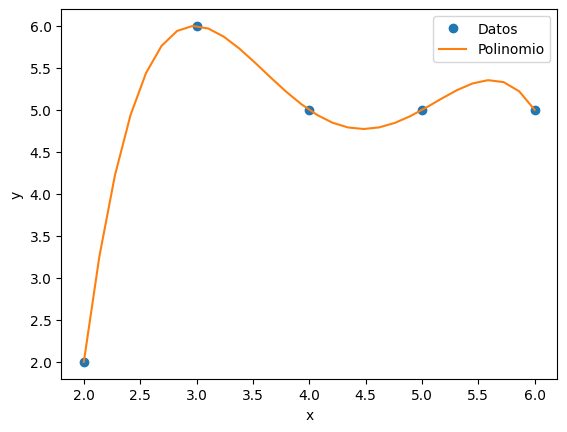

In [2]:
x1 = np.array([2, 3, 4, 5, 6])
y1 = np.array([2, 6, 5, 5, 5]) # evaluar la función
L = 1 # para los coeficientes de lagrange
x = 0.3 # punto de interpolación

def lagrange(dataxs, datays, L, x):
    val = 0
    n = len(dataxs)
    x = sym.Symbol('x')
    polinomio = 0
    for k in range(n):
        L = 1
        for j in range(n):
            if j == k:
                continue
            L *= (x - dataxs[j]) / (dataxs[k] - dataxs[j]) # puntos cardinales de Lagrange
        polinomio += datays[k] * L # fórmula de interpolación

    polisimple = polinomio.expand().evalf()

    # para evaluación numérica
    px = sym.lambdify(x, polisimple)

    return px, polisimple

px, polisimple = lagrange(x1, y1, L, x)
px, polisimple
print(polisimple)

# Gráfica
xi = np.linspace(2, 6, 30)

plt.plot(x1,y1,'o', label = 'Datos')
plt.plot(xi, px(xi), label = 'Polinomio')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 2.- 

# 3.-

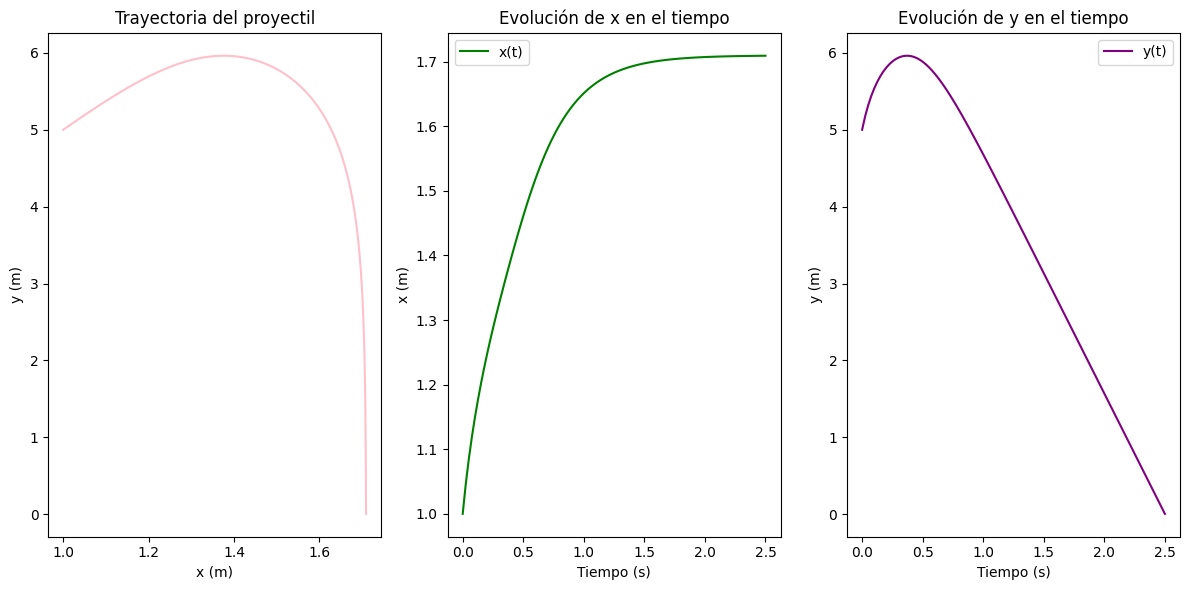

In [6]:
# Definición de las ecuaciones diferenciales
def f(r, t): 
    vx = r[2] 
    vy = r[3] 
    fx = vx # Velocidad en la dirección x
    fy = vy # Velocidad en la dirección y
    fvx = -k * vx * np.sqrt(vx**2 + vy**2) # Aceleración en dirección x
    fvy = -g - k * vy * np.sqrt(vx**2 + vy**2) # Aceleración en dirección y
    return np.array([fx, fy, fvx, fvy], float) 

# RK4 vectorial
def rk4(f, n, r0, xn, x0):
    h = (xn-x0)/(n-1)
    tpoints = np.linspace(x0, xn, n)
    solution = np.zeros((n, len(r0)))  # crea una matriz (npt, nEq) nEq=len(r0)
    r = r0.copy() 
    # Calcular la solución del sistema de ecuaciones diferenciales en cada punto de tiempo
    for i, t in enumerate(tpoints): 
        solution[i] = r # Almacenamos el estado actual del sistema en cada punto de tiempo en la matriz
        k1 = h * f(r, t)
        k2 = h * f(r + k1/2, t + h/2)
        k3 = h * f(r + k2/2, t + h/2)
        k4 = h * f(r + k3, t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return tpoints, solution


# Condiciones iniciales
xi = 1.0  # posición inicial en x
yi = 5.0  # posición inicial en y
vxi = 2.0  # velocidad inicial en x
vyi = 7.808  # velocidad inicial en y
r0 = np.array([xi, yi, vxi, vyi], float) # inicialización de vector que contiene las variables del sistema (posición y velocidad en las direcciones x, y)
g = 9.8  
k = 1.0 

# Intervalo de integración y número de puntos
x0 = 0.0
xn = 2.5
n = 100

# Soluciones
tpoints, solution = rk4(f, n, r0, xn, x0)

# Gráficas
plt.figure(figsize=(12, 6))

# Trayectoria del proyectil
plt.subplot(1, 3, 1)
plt.plot(solution[:, 0], solution[:, 1], color = 'pink')
plt.title('Trayectoria del proyectil')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

# Evolución de las coordenadas en el tiempo
plt.subplot(1, 3, 2)
plt.plot(tpoints, solution[:, 0], label='x(t)', color = 'green')
plt.title('Evolución de x en el tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('x (m)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(tpoints, solution[:, 1], label='y(t)', color = 'purple')
plt.title('Evolución de y en el tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('y (m)')
plt.legend()

plt.tight_layout()
plt.show()

# 4.-

Autovalor de energía 1: 4.934802200552723
Autovalor de energía 2: 19.739208802693508
Autovalor de energía 3: 44.413219810765774
Autovalor de energía 4: 78.95683524166002


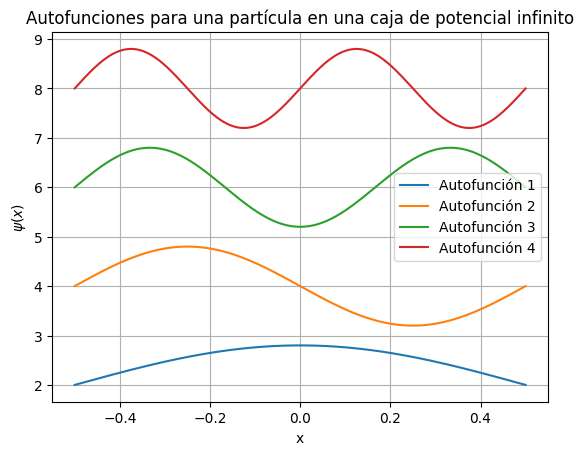

In [15]:
hbar = 1
m = 1  # masa
a = 0.5  # longitud de la caja

# Definición de las funciones de onda (autofunciones)
def psi(x, n):
    return np.sin(n * np.pi * x / a)

# isminuir el orden de la ecuación de segundo orden y obtener el sistema de ecuaciones
def fs(x, yvals, E):
    psi, phi = yvals
    f0 = phi  # primera ecuación diferencial de primer orden d(psi)/dx = phi
    f1 = 2 * m / hbar ** 2 * (0 - E) * psi  # segunda ecuación diferencial de primer orden d(phi)/dx = 2m/hbar^2 * (V - E) * psi
    return np.array([f0, f1]) 

# Definimos el método de Runge-Kutta de orden 4 modificado para resolver sistema de ecuaciones
def rk4_gen_eig(fs, a, b, n, yinits, E):
    h = (b - a) / (n - 1)
    xs = a + np.arange(n) * h
    ys = np.zeros((n, yinits.size))
    yvals = np.copy(yinits)
    for j, x in enumerate(xs):
        ys[j, :] = yvals
        k0 = h * fs(x, yvals, E)
        k1 = h * fs(x + h / 2, yvals + k0 / 2, E)
        k2 = h * fs(x + h / 2, yvals + k1 / 2, E)
        k3 = h * fs(x + h, yvals + k2, E)
        yvals += (k0 + 2 * k1 + 2 * k2 + k3) / 6
    return xs, ys

# función de shooting
def shoot(E):  
    a_local, b_local, n = -a, a, 1000  
    yinits = np.array([0., 1.])  # condiciones iniciales de psi y phi en 0 y 1
    xs, ys = rk4_gen_eig(fs, a_local, b_local, n, yinits, E) 
    return ys[-1, 0]  # encontrar el valor de E que hace que psi sea cero en x = a

# Buscamos los primeros cuatro autovalores de energía
E_vals = []
for i, E_init in enumerate(np.linspace(0, 57, 4)):
    try:
        E_val = newton(shoot, E_init)
        E_vals.append(E_val)
        print(f"Autovalor de energía {i + 1}: {E_val}")
    except ValueError:
        continue

# Imprimimos las autofunciones correspondientes con separaciones entre ellas
for i, E_val in enumerate(E_vals, 1):
    xs, ys = rk4_gen_eig(fs, -a, a, 1000, np.array([0., 1.]), E_val)
    
    ys[:, 0] = ys[:, 0] / np.max(np.abs(ys[:, 0])) * 0.8 + 2 * i # normalizar la función con fines estéticos del gráfico
    
    plt.plot(xs, ys[:, 0], label=f"Autofunción {i}")

plt.legend()
plt.xlabel('x')
plt.ylabel(r"$\psi(x)$")
plt.title('Autofunciones para una partícula en una caja de potencial infinito')
plt.grid(True)
plt.show()